In [190]:
# This file analyzes data from an exoplanet data csv file and creates graphs based on the analysis.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#UNIT CONVERSIONS TO SI 
"""
Days * 86400 Seconds/Day
EarthRadius * 6.378e+6 Meters/EarthRadius
EarthMass * 5.972e+24 Kilogram/EarthMass
parsec * 3.0857e+16 meter/parsec
"""

#CONSTANTS
Kb = 1.380649e-23 # Boltzmann Constant (Joules/Kelvin)
mu = 4.8e-26 # Average mass of gas particle on Earth (Kilograms)
G = 6.67428e-11 # Gravitational Constant (m^3 * Kg^-1 * s^-2)
A = 0.3 # Bond Albedo
Gf = 1.4 # Greenhouse factor of earth

In [192]:
pd.read_csv("ExoplanetData.csv")

,pl_name,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_bmassprov,pl_orbeccen,pl_eqt,st_rad,st_mass,st_logg,rastr,ra,decstr,dec,sy_dist
0,11 Com b,NaN,1.210,NaN,5434.70000,Msini,NaN,NaN,NaN,2.60,NaN,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846
1,11 Com b,326.03000,1.290,NaN,6165.60000,Msini,0.231,NaN,19.00,2.70,2.31,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846
2,11 Com b,323.21000,1.178,NaN,4914.89849,Msini,0.238,NaN,13.76,2.09,2.45,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846
3,11 UMi b,516.21997,1.530,NaN,4684.81420,Msini,0.080,NaN,29.79,2.78,1.93,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210
4,11 UMi b,NaN,1.510,NaN,3432.40000,Msini,NaN,NaN,NaN,1.70,NaN,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36552,ups And d,1319.00000,2.570,NaN,1255.38000,Msini,0.269,NaN,NaN,NaN,NaN,01h36m47.60s,24.198353,+41d24m13.73s,41.403815,13.4054
36553,ups Leo b,385.20000,1.180,NaN,162.09249,Msini,0.320,NaN,11.22,1.48,2.46,11h36m56.93s,174.237219,-00d49m24.83s,-0.823564,52.5973
36554,xi Aql b,NaN,0.580,NaN,642.00000,Msini,NaN,NaN,NaN,1.40,NaN,19h54m14.99s,298.562449,+08d27m39.98s,8.461105,56.1858
36555,xi Aql b,136.75000,0.680,NaN,890.00000,Msini,0.000,NaN,12.00,2.20,2.66,19h54m14.99s,298.562449,+08d27m39.98s,8.461105,56.1858


In [194]:
df = pd.read_csv("ExoplanetData.csv")

In [196]:
# converting data to have SI units (only run once)
df['pl_rade'] = df['pl_rade'].mul(6.378e+6)
df['pl_bmasse'] = df['pl_bmasse'].mul(5.972e+24)
df['sy_dist'] = df['sy_dist'].mul(3.0857e+16)
def atmospheric_t(x = Gf): #atmospheric temperature estimated with a constant value multiplied with equilibrium temperature
    return x*df['pl_eqt']


In [198]:
# filtering data to have only distance, mass, radius, and equilibrium temperature viable dataset
df.dropna(subset=['pl_rade'], inplace=True)
df.dropna(subset=['pl_bmasse'], inplace=True)
df.dropna(subset=['pl_eqt'], inplace=True)
df.dropna(subset=['sy_dist'], inplace=True)

escape_v = np.sqrt(2*G* df['pl_bmasse']/df['pl_rade']) #Equation for escape velocity
def thermal_v(x=Gf):
    #returns values of thermal velocity with respect to atmospheric temperature and constant x.
    return np.sqrt(3*Kb*atmospheric_t(x)/mu) #Equation for thermal velocity

In [200]:
def velocity_analysis(x=Gf):
    #WARNING !!! This function downloads a pdf of the graphs analyzing velocity and distance from earath.
    
    data = {'Escape_Velocity': escape_v, 'Thermal_Velocity': thermal_v(x), 'Distance': df['sy_dist']} #creating data
    var = pd.DataFrame(data) #creating dataframe that will be used for plotting

    #Formatting
    fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2)
    fig.subplots_adjust(wspace=.5,hspace=0.6)
    plt.suptitle(f'Velocity-Distance Analysis (Gf = {x})')
    
    ax1.scatter(var['Distance'],var['Escape_Velocity'],label='Escape Velocity')
    ax1.legend(fontsize=6)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel('Distance')
    ax1.set_ylabel('Velocity')
    ax1.set_title('Escape Velocity x Distance',fontsize=8)
    
    ax2.scatter(var['Distance'],var['Thermal_Velocity'],label='Thermal Velocity')
    ax2.legend(fontsize=6)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_xlabel('Distance')
    ax2.set_ylabel('Velocity')
    ax2.set_title('Thermal Velocity x Distance',fontsize=8)
    
    ax3.scatter(var['Distance'],var['Escape_Velocity'],label='Escape Velocity')
    ax3.scatter(var['Distance'],var['Thermal_Velocity'],label='Thermal Velocity')
    ax3.legend(fontsize=6)
    ax3.set_xscale('log')
    ax3.set_yscale('log')
    ax3.set_xlabel('Distance')
    ax3.set_ylabel('Velocity')
    ax3.set_title('Velocity x Distance',fontsize=8)

    ax4.scatter(var['Distance'],var['Thermal_Velocity']-var['Escape_Velocity'],label = 'Thermal-Escape V')
    ax4.legend(fontsize=6)
    ax4.set_xscale('log')
    ax4.set_yscale('log')
    ax4.set_xlabel('Distance')
    ax4.set_ylabel('Velocity')
    ax4.set_title('Thermal-Escape V x Distance', fontsize=8)
    
    plt.savefig(f'Velocity_Analysis_G={x}.pdf')

C:\Users\adria\AppData\Local\Temp\ipykernel_30828\1587404127.py:40: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax4.set_yscale('log')


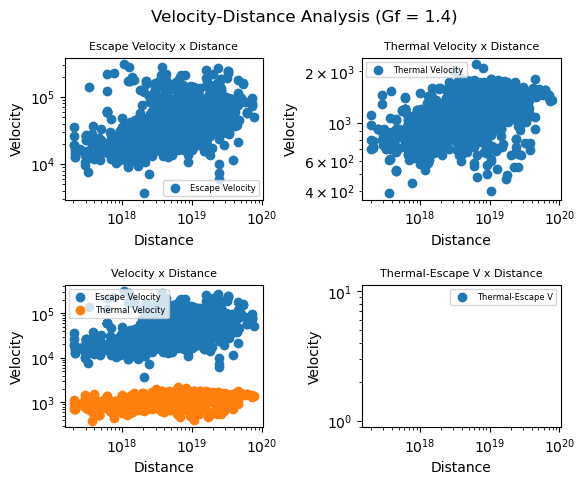

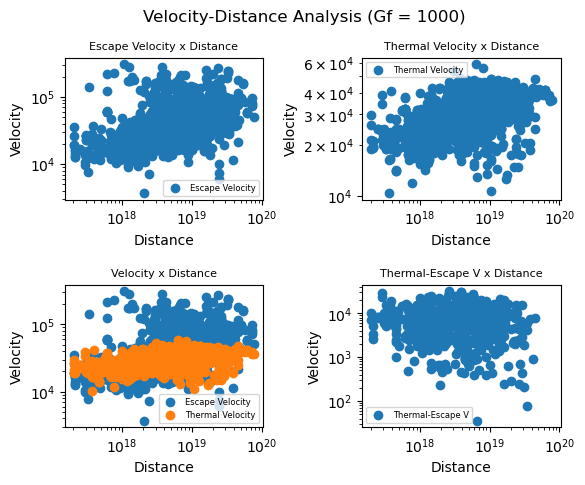

In [202]:
#What I used to download the figures
velocity_analysis()
velocity_analysis(1000)